In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# Create a reference to the file. 
database_path = Path("/Users/ellandalla/Desktop/sqlalchemy-challenge/SurfsUp/Resources/hawaii.sqlite")
# create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [5]:

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
classes = Base.classes.keys()
# Print the list of class names
for cls_name in classes:
    print(cls_name)

measurement
station


In [7]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [9]:
# Query All Records in the the Measuerement table

Measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
station_data = pd.read_sql("SELECT * FROM station", conn)

Measurement_data.head()
#station_data.head()

## Find the most recent date in the dataset

recent_date = Measurement_data["date"].max()
recent_date
m_types = Measurement_data.dtypes
m_types

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

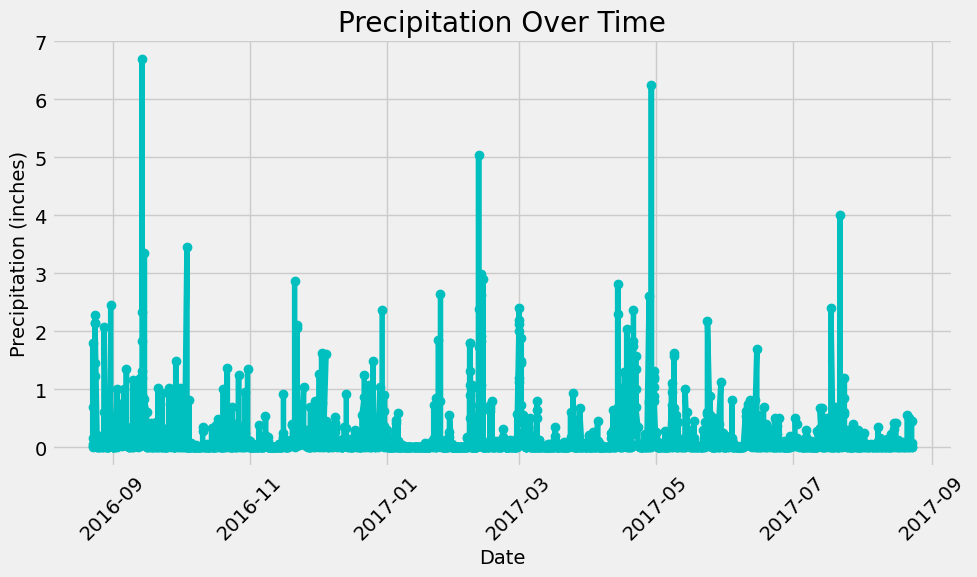

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Convert 'date' column to datetime data type
Measurement_data['date'] = pd.to_datetime(Measurement_data['date'])



# Starting from the most recent data point in the database. 
recent_date = Measurement_data["date"].max()

# Calculate the date one year from the last date in data set.
start_date = recent_date - pd.DateOffset(months=12)


# Perform a query to retrieve the data and precipitation scores

#  create a new DataFrame to include only the past 12 months
P12_months_data = Measurement_data.loc[(Measurement_data['date'] >= start_date) & (Measurement_data['date'] <= recent_date)]


## retrive precipitation data
precipitation_data = P12_months_data["prcp"]

# Save the query results as a Pandas DataFrame. Explicitly set the column names
new_measurement = P12_months_data[["date", "prcp"]]

# Sort the dataframe by date

sorted_measurement = new_measurement.sort_values(by='date')
sorted_measurement
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(sorted_measurement['date'], sorted_measurement['prcp'], marker='o', linestyle='-', color='c')
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()








In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = sorted_measurement['prcp'].describe()
summary_statistics


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
station_data
station_count = station_data["station"].value_counts().sum()
station_count


,id,station,name,latitude,longitude,elevation
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = station_data["station"].mode()
#sorted_list = station_count_list.sort()
station_counts_sorted = active_station.sort_values(ascending=False)
station_counts_sorted.head()

8    USC00519523
7    USC00519397
6    USC00519281
5    USC00518838
4    USC00517948
Name: station, dtype: object

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
USC00519523 = Measurement_data[Measurement_data["station"] =="USC00519523"]
lowest= Measurement_data["prcp"].min()
highest = Measurement_data["prcp"].max()
average =Measurement_data["prcp"].mean()
print (lowest,
      highest,
      average)

0.0 11.53 0.16064353974479367


In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
P12_USC00519523 = P12_months_data[P12_months_data["station"] =="USC00519523"]
P12_USC00519523

,id,station,date,prcp,tobs
11850,11851,USC00519523,2016-08-23,0.02,80.0
11851,11852,USC00519523,2016-08-24,1.22,79.0
11852,11853,USC00519523,2016-08-25,0.21,80.0
11853,11854,USC00519523,2016-08-26,0.00,84.0
11854,11855,USC00519523,2016-08-27,0.00,81.0
...,...,...,...,...,...
12182,12183,USC00519523,2017-08-17,0.05,83.0
12183,12184,USC00519523,2017-08-19,NaN,85.0
12184,12185,USC00519523,2017-08-21,NaN,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


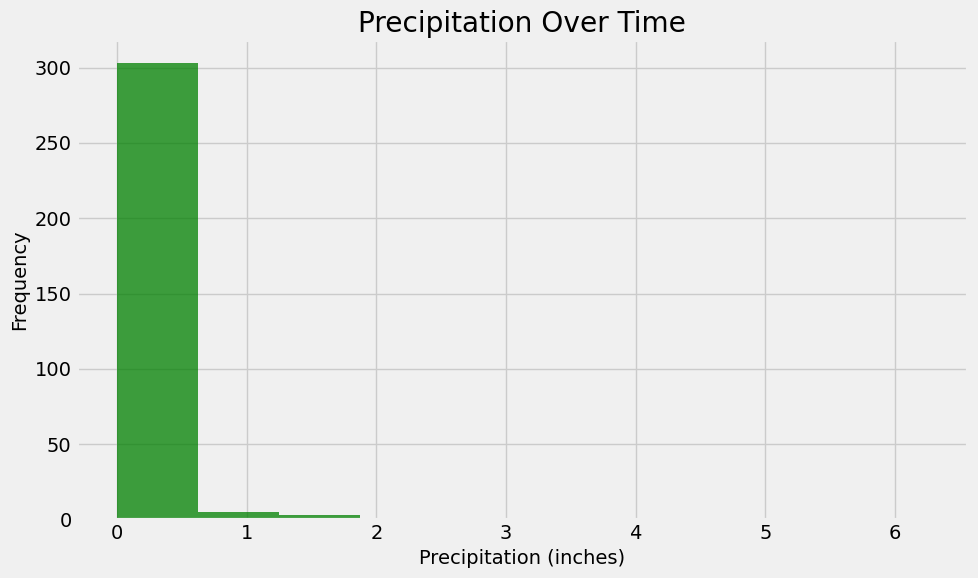

In [48]:
# plot histogram

plt.figure(figsize=(10, 6))
plt.hist(P12_USC00519523['prcp'], bins=10, alpha=0.75, color='green')
plt.title('Precipitation Over Time')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Close Session

In [49]:
# Close Session
session.close()